## Problem definition
    In this dataset you have to predict that whether we have to give 
    ATTORNEY to the clients or not (0=Yes, 1=No) based on below factors.
    CLMAGE - Age of Client
    CLMSEX - Sex of client (0=Male, 1= Female)
    SEATBELT - Whether client has Seatbelt or not (0=Yes, 1=No)
    CLMINSUR - Whether Client give Insurance or not (0=Yes, 1=No)
    LOSS - Loss that client faced

    Prepare model by using logistic regression & Also calculate 
    Accuracy by confusion matrix, Calculate accuracy score, precision score,
    recall score, f1 score, roc auc score. Also Visualize the result. 
    Also select best parameters using gridsearchCV. 

### import required packages

In [120]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### load the data

In [121]:
df = pd.read_csv("claimants.csv")

In [122]:
df.head()

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0,0.0,1.0,0.0,50.0,34.940
1,1,1.0,0.0,0.0,18.0,0.891
2,1,0.0,1.0,0.0,5.0,0.330
3,0,0.0,1.0,1.0,31.0,0.037
4,1,0.0,1.0,0.0,30.0,0.038


### EDA

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ATTORNEY  1340 non-null   int64  
 1   CLMSEX    1328 non-null   float64
 2   CLMINSUR  1299 non-null   float64
 3   SEATBELT  1292 non-null   float64
 4   CLMAGE    1151 non-null   float64
 5   LOSS      1340 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 62.9 KB


### dealing with NaN values

In [124]:
df.isna().sum()

ATTORNEY      0
CLMSEX       12
CLMINSUR     41
SEATBELT     48
CLMAGE      189
LOSS          0
dtype: int64

In [125]:
df['CLMSEX'] = df['CLMSEX'].fillna(df['CLMSEX'].mean())

In [126]:
df['CLMINSUR'] = df['CLMINSUR'].fillna(df['CLMINSUR'].mean())

In [127]:
df['SEATBELT'] = df['SEATBELT'].fillna(df['SEATBELT'].mean())

In [128]:
df['CLMAGE'] = df['CLMAGE'].fillna(df['CLMAGE'].mean())

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ATTORNEY  1340 non-null   int64  
 1   CLMSEX    1340 non-null   float64
 2   CLMINSUR  1340 non-null   float64
 3   SEATBELT  1340 non-null   float64
 4   CLMAGE    1340 non-null   float64
 5   LOSS      1340 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 62.9 KB


In [130]:
df.describe()

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
count,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000
mean,0.488806,0.558735,0.907621,0.017028,28.414422,3.806307
std,0.500061,0.494494,0.285202,0.127084,18.816978,10.636903
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,10.000000,0.400000
50%,0.000000,1.000000,1.000000,0.000000,28.414422,1.069500
75%,1.000000,1.000000,1.000000,0.000000,40.000000,3.781500
max,1.000000,1.000000,1.000000,1.000000,95.000000,173.604000


In [131]:
df.corr()

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
ATTORNEY,1.000000,0.079321,0.078221,-0.056158,0.009886,-0.219715
CLMSEX,0.079321,1.000000,0.065382,-0.014778,-0.021428,-0.027602
CLMINSUR,0.078221,0.065382,1.000000,0.020899,0.046255,0.005810
SEATBELT,-0.056158,-0.014778,0.020899,1.000000,-0.026234,0.111031
CLMAGE,0.009886,-0.021428,0.046255,-0.026234,1.000000,0.057641
LOSS,-0.219715,-0.027602,0.005810,0.111031,0.057641,1.000000


In [132]:
df.drop(['CLMSEX', 'CLMAGE', 'CLMINSUR'], axis=1, inplace=True)

### Data Imbalacing

In [133]:
# handeling data imbalancing
df['ATTORNEY'].value_counts()

ATTORNEY
0    685
1    655
Name: count, dtype: int64

In [134]:
# no need for data balancing because the classes in the attorney is balanced

### Data spliting

In [135]:
from sklearn.model_selection import train_test_split
x=df.drop('ATTORNEY', axis=1)
y=df['ATTORNEY']
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.7,random_state=123456)

#### training a model

In [136]:
from sklearn.linear_model import LogisticRegression
# {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
# {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
# {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
model = LogisticRegression( C=0.01, penalty='l2', solver='liblinear')
model.fit(x_train,y_train)

LogisticRegression(C=0.01, solver='liblinear')

### model evaluation

In [137]:
y_pred = model.predict(x_test)
y_true = y_test

#### classification report

In [138]:
from sklearn.metrics import classification_report
print(classification_report(y_true,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.65      0.69       207
           1       0.67      0.77      0.72       196

    accuracy                           0.71       403
   macro avg       0.71      0.71      0.71       403
weighted avg       0.71      0.71      0.71       403



#### roc

In [139]:
from sklearn.metrics import roc_auc_score
roc = roc_auc_score(y_true, y_pred)
roc

np.float64(0.7088755792171941)

In [140]:
from sklearn.metrics import roc_curve
fpr, tpr, threshold= roc_curve(y_true, y_pred)

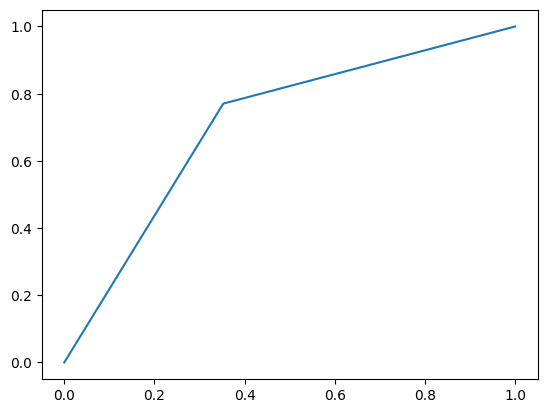

In [141]:
plt.plot(fpr,tpr)

### Model optimization

In [115]:
from sklearn.model_selection import GridSearchCV
hyper_parameters = {
    "penalty": ["l1", "l2", "elasticnet"],
    "C": [10, 5, 1.0, 0.1, 0.01, 0.001],
    "solver": ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
}
grid_search_cv = GridSearchCV(estimator=model, param_grid=hyper_parameters)

In [116]:
grid_search_cv

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [10, 5, 1.0, 0.1, 0.01, 0.001],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']})

In [117]:
grid_search_cv.fit(x_train,y_train)

C:\Users\Aaditya\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Aaditya\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Aaditya\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Aaditya\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Aaditya\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which 

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [10, 5, 1.0, 0.1, 0.01, 0.001],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']})

In [118]:
grid_search_cv.best_score_

np.float64(0.7171691887586757)

In [119]:
grid_search_cv.best_params_

{'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}